In [31]:
#!pip3 install seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re

# Path to the JS file
file_path = './files/dataset.js'

# Read the content of the JS file
with open(file_path, 'r') as file:
    js_content = file.read()

# Extracting the exp_list variable using regular expression
exp_list_matches = re.search(r"const exp_list\s*=\s*(\[.*?\]);", js_content, re.DOTALL)

# Check if the exp_list is found and convert it to Python list
if exp_list_matches:
    exp_list_js = exp_list_matches.group(1)

    # Convert JavaScript list to Python list
    # Replace JavaScript object notation with Python dictionary notation
    exp_list_py = eval(exp_list_js.replace("'", "\""))
else:
    exp_list_py = None

# Displaying the first 5 elements of the extracted list for verification
print(exp_list_py[:5])

exp_list=exp_list_py


[{'id': 'You can see relationships between parts', 'name': 'SE1', 'link_positive': [{'IA1': 0.7}, {'IA2': 0.7}, {'VE1': 0.9}, {'VE5': 0.8}], 'link_negative': [{'VE4': -0.6}, {'VE2': -0.7}, {'VE3': -0.7}, {'SE2': -0.9}]}, {'id': 'You can change your mind easily', 'name': 'SE2', 'link_positive': [], 'link_negative': [{'SE1': -0.9}]}, {'id': 'There are routes linking known to undiscovered', 'name': 'SE3', 'link_positive': [{'SE1': 0.8}, {'ME3': 0.7}, {'TE1': 0.6}, {'IE3': 0.7}, {'ME5': 0.5}], 'link_negative': []}, {'id': 'You can compare or contrast different parts', 'name': 'SE4', 'link_positive': [{'VE1': 0.9}, {'VE5': 0.6}, {'ME3': 0.7}, {'ME4': 0.7}, {'TE2': 0.5}], 'link_negative': []}, {'id': 'The information you need is visible', 'name': 'VE1', 'link_positive': [{'VE4': 0.9}], 'link_negative': []}]


In [3]:
# Create a dictionary to map each child to its parent's name and ID
parent_map= [{"id": "Search",
    "name": "IA1",
    "size": 1,
    "imports": ["VE1", "VE4", "SE3", "TE4"]
  },
  {
    "id": "Comparison",
    "name": "IA2",
    "size": 1,
    "imports": ["VE5", "SE4", "ME4", "TE2"]
  },
  {
    "id": "Sense-making",
    "name": "IA3",
    "size": 1,
    "imports": ["VE2", "VE3", "SE1", "ME1", "ME3", "TE3", "TE5"]
  },
  {
    "id": "Incrementation",
    "name": "CA1",
    "size": 1,
    "imports": ["IE1", "PE6"]
  },
  {
    "id": "Transcription",
    "name": "CA2",
    "size": 1,
    "imports": ["ME2", "IE2", "IE3", "IE5", "PE2", "PE5"]
  },
  {
    "id": "Modification",
    "name": "CA3",
    "size": 1,
    "imports": ["SE2", "ME5", "IE4", "TE1", "PE1", "CE1"]
  },
  {
    "id": "Exploratory design",
    "name": "CA4",
    "size": 1,
    "imports": ["TE5", "PE3", "PE4", "CE2", "CE3", "CE4"]
  },
  {
    "id": "Illustrate a story",
    "name": "SA1",
    "size": 1,
    "imports": ["VE2", "VE4", "IE6", "TE1", "CE3"]
  },
  {
    "id": "Organise a discussion",
    "name": "SA2",
    "size": 1,
    "imports": ["ME5", "IE2", "TE2", "PE3", "PE4", "CE4"]
  },
  {
    "id": "Persuade an audience",
    "name": "SA3",
    "size": 1,
    "imports": ["VE3", "SE4", "ME2", "ME6", "IE5", "TE3", "TE5"]
  }
]

# Convert the list of dictionaries to a child-to-parents mapping
child_to_parents = {}
for activity in parent_map:
    for child in activity["imports"]:
        if child not in child_to_parents:
            child_to_parents[child] = []
        child_to_parents[child].append(f"{activity['name']} {activity['id']}")

# Function to format the tick labels
def format_tick_label(child, parents_info):
    parent_str = '\n'.join(parents_info)
    return f"{child}\n{parent_str}"

# Update the tick labels on the heatmap
def update_tick_labels(ax, labels):
    new_labels = []
    for label in labels:
        child = label.get_text().split(' ')[0]  # Extracting the child ID
        parents_info = child_to_parents.get(child, ["Unknown"])
        new_labels.append(format_tick_label(child, parents_info))
    return new_labels

## Experience-Experience plot

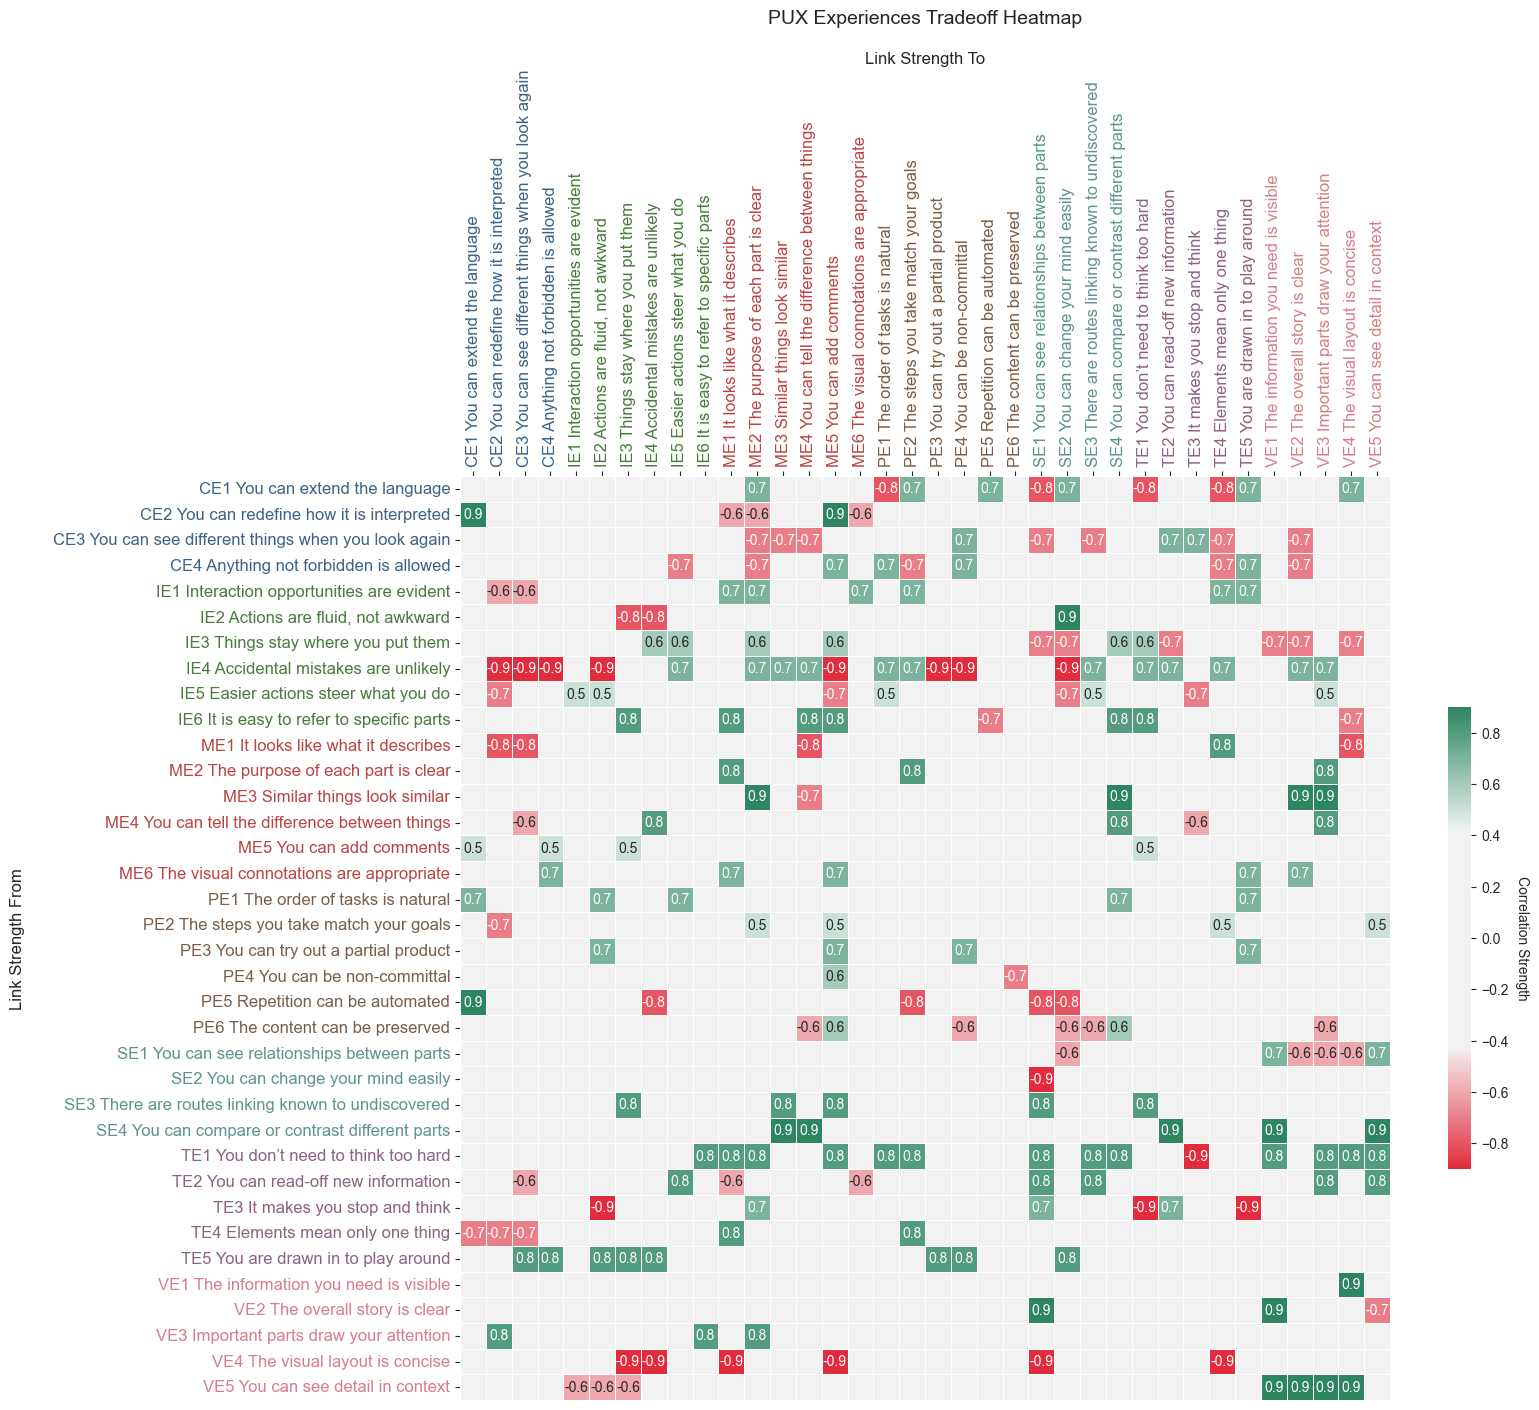

In [48]:
# Implement the changes with the correct colormap for positive (green) and negative (red) values

# Extract unique names from the data and sort them
names = sorted(list({entry['name'] for entry in exp_list}))
# tick_names = sorted(list({(str(child_to_parents[entry['name']])+" "+entry['name']+" "+entry['id']) for entry in exp_list}))
tick_names = sorted(list({(entry['name']+" "+entry['id']) for entry in exp_list}))

# Create a dictionary for quick access to the links based on the name
link_dict = {entry['name']: entry for entry in exp_list}

# Initialize a matrix of zeros with dimensions based on the number of unique names
matrix = np.zeros((len(names), len(names)))

# Populate the matrix with the link values
for index, name in enumerate(names):
    # Check for negative links if the cell's name is from the x axis
    if name in link_dict:
        for link in link_dict[name]['link_negative']:
            key = next(iter(link))
            # print(name,"\n",link,"\n",key)
            index_of = names.index(key)
            value=next(iter(link_dict[name]['link_negative'][0].values()))
            matrix[index_of, index] = value
            
    # print("positive")
    # Check for negative links if the cell's name is from the x axis
    if name in link_dict:
        for link in link_dict[name]['link_positive']:
            key = next(iter(link))
            # print(name,"\n",link,"\n",key)
            if key in names:
                index_of = names.index(key)
                value=next(iter(link_dict[name]['link_positive'][0].values()))
                matrix[index_of, index] = value

# Define a custom diverging colormap with green for positive and red for negative
cmap = sns.diverging_palette(10, 150, s=85, l=50, sep=120, as_cmap=True)

# Create a heatmap from the matrix
plt.figure(figsize=(15, 12))

# Set tick labels on top
ax = sns.heatmap(matrix.T, annot=True, fmt=".1f", xticklabels=tick_names, yticklabels=tick_names, cmap=cmap, cbar=True, linewidths=.5, cbar_kws={"shrink": 0.5})

# Define color codes for each group
group_colors = {
    'SE': '#5E948F',  # Cyan
    'VE': '#D67E8A',  # Pink
    'ME': '#B94644',  # Red
    'IE': '#487D3E',  # Green
    'TE': '#8E6280',  # Purple
    'PE': '#7A5E4A',  # Brown
    'CE': '#3D6386'   # Blue
}

# Function to determine color based on the tick label
def get_color_for_tick(tick):
    for prefix, color in group_colors.items():
        if tick.startswith(prefix):
            return color
    return 'black'  # Default color


# Rotate the x-axis and y-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)  # Increase font size for x-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)   # Increase font size for y-axis tick labels


# Move x-axis ticks to the top and y-axis ticks to the left
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

# Add labels to the x and y axis with the y-axis label at the top
ax.set_xlabel('Link Strength To', fontsize=12)
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.set_ylabel('Link Strength From', fontsize=12)
ax.yaxis.set_label_position('left')  # Keep the y-axis label on the left
ax.yaxis.labelpad = 20  # Add some padding for the y-axis label

# Add a title to the heatmap
ax.set_title('PUX Experiences Tradeoff Heatmap', fontsize=14, pad=20)



# Apply colors to x-axis tick labels
for tick_label in ax.get_xticklabels():
    tick_text = tick_label.get_text()
    tick_label.set_color(get_color_for_tick(tick_text))

# Apply colors to y-axis tick labels
for tick_label in ax.get_yticklabels():
    tick_text = tick_label.get_text()
    tick_label.set_color(get_color_for_tick(tick_text))


# Add a label to the colorbar
colorbar = ax.collections[0].colorbar
colorbar.set_label('Correlation Strength', rotation=270, labelpad=15)

# Improve visibility of the gridlines and remove text for '0' value cells
for t in ax.texts:
    if t.get_text() == '0.0':
        t.set_text('')

plt.savefig("./exp_tradeoff.svg", format='svg')

plt.show()


## Experience-Activity plot

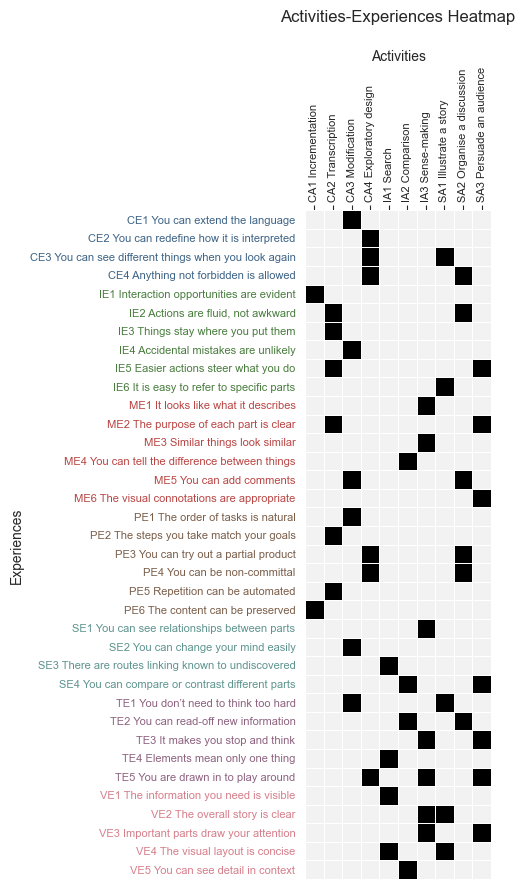

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `exp_list` and `child_to_parents` are already defined

# Extract and sort tick names and groups
tick_names = sorted({(entry['name'] + " " + entry['id']) for entry in exp_list})
groups = sorted(set(group for item_groups in child_to_parents.values() for group in item_groups))

# Initialize a matrix of zeros with dimensions based on the number of unique names and groups
matrix = pd.DataFrame(0, index=tick_names, columns=groups)

# Populate the matrix
for entry in exp_list:
    item_label = entry['name'] + " " + entry['id']
    for group in child_to_parents.get(entry['name'], []):
        if group in matrix.columns:
            matrix.at[item_label, group] = 1

# Function to determine color based on the tick label
def get_color_for_tick(tick):
    for prefix, color in group_colors.items():
        if tick.startswith(prefix):
            return color
    return 'black'  # Default color

# Create the heatmap
plt.figure(figsize=(9, 9))  # Adjust the figure size for square cells
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.heatmap(matrix, cmap=["#F2F2F2", "black"], cbar=False, square=True, linewidths=0.5, linecolor='white')

# Set the tick labels
ax.set_yticklabels(tick_names, rotation=0, fontsize=8)
ax.set_xticklabels(groups, rotation=90, fontsize=8)

# Apply colors to x-axis and y-axis tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_color(get_color_for_tick(label.get_text()))

# Move x-axis to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

# Set axis labels and title
ax.set_xlabel('Activities', fontsize=10)
ax.set_ylabel('Experiences', fontsize=10)
ax.set_title('Activities-Experiences Heatmap', fontsize=12, pad=20)
plt.tight_layout()  # Adjust layout

# Save the plot as an SVG file
# plt.savefig("./act-exp.svg", format='svg')

plt.show()


## Combined plot

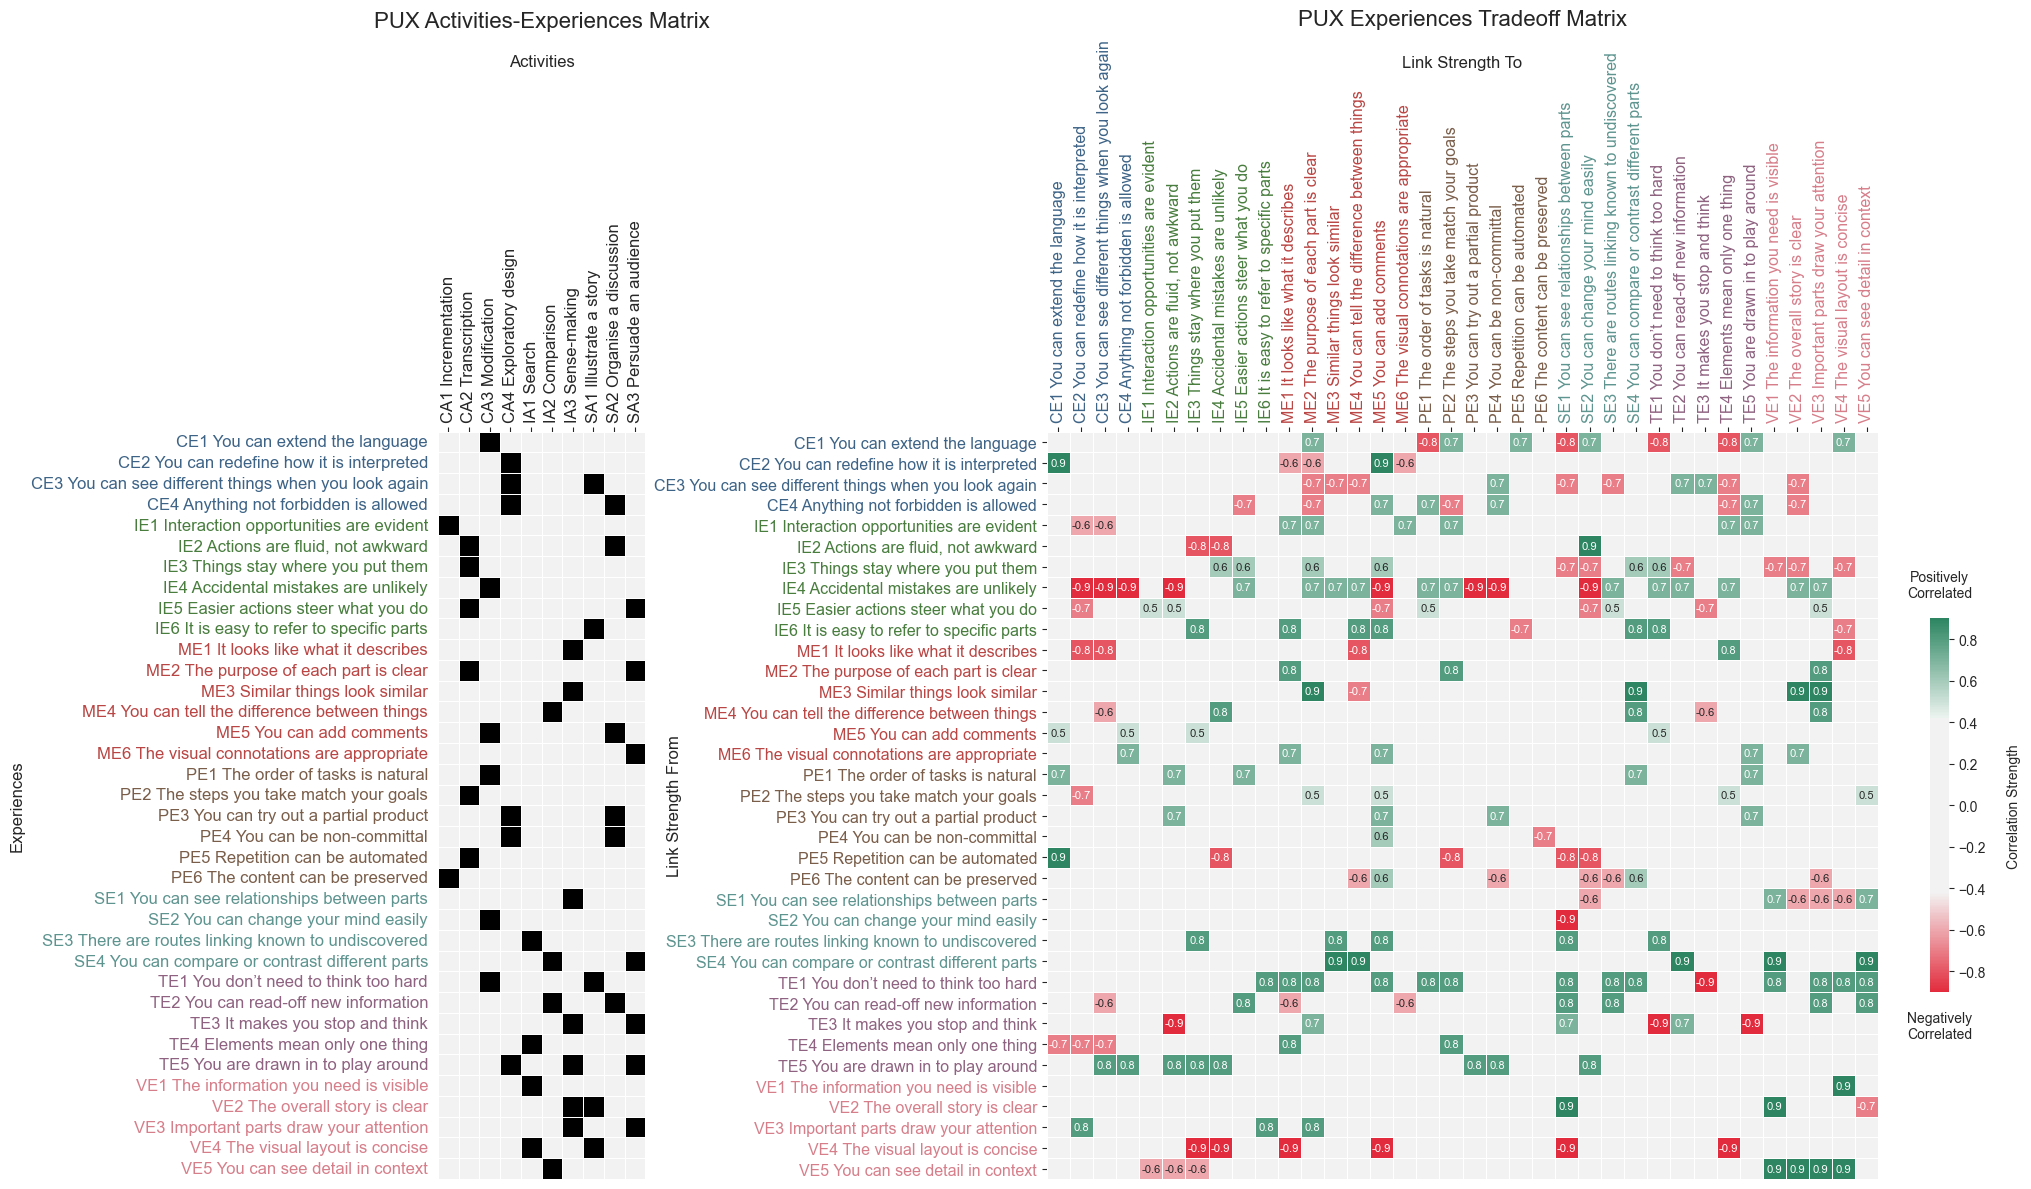

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This code combines the two provided plots into a single figure with shared y-axis ticks

# Extract unique names from the data and sort them
names = sorted(list({entry['name'] for entry in exp_list}))
tick_names = sorted(list({(entry['name']+" "+entry['id']) for entry in exp_list}))

# Create a dictionary for quick access to the links based on the name
link_dict = {entry['name']: entry for entry in exp_list}

# # Initialize a matrix of zeros for the right plot
# matrix_right = np.zeros((len(names), len(names)))

# # Populate the matrix for the right plot
# for x_index, x_name in enumerate(names):
#     for y_index, y_name in enumerate(names):
#         if y_name in link_dict:
#             for link in link_dict[y_name]['link_negative']:
#                 if x_name in link:
#                     matrix_right[x_index, y_index] = link[x_name]

#         if x_name in link_dict:
#             for link in link_dict[x_name]['link_positive']:
#                 if y_name in link:
#                     matrix_right[x_index, y_index] = link[y_name]
                    
                    

# Initialize a matrix of zeros for the right plot
matrix_right = np.zeros((len(names), len(names)))

# Populate the matrix with the link values
for index, name in enumerate(names):
    # Check for negative links if the cell's name is from the x axis
    if name in link_dict:
        for link in link_dict[name]['link_negative']:
            key = next(iter(link))
            # print(name,"\n",link,"\n",key)
            index_of = names.index(key)
            value=next(iter(link_dict[name]['link_negative'][0].values()))
            matrix_right[index_of, index] = value
            
    # print("positive")
    # Check for negative links if the cell's name is from the x axis
    if name in link_dict:
        for link in link_dict[name]['link_positive']:
            key = next(iter(link))
            # print(name,"\n",link,"\n",key)
            if key in names:
                index_of = names.index(key)
                value=next(iter(link_dict[name]['link_positive'][0].values()))
                matrix_right[index_of, index] = value
                
                

# Define a custom diverging colormap with green for positive and red for negative
cmap = sns.diverging_palette(10, 150, s=85, l=50, sep=120, as_cmap=True)

# Extract and sort tick names and groups for the left plot
groups = sorted(set(group for item_groups in child_to_parents.values() for group in item_groups))

# Initialize a matrix of zeros for the left plot
matrix_left = pd.DataFrame(0, index=tick_names, columns=groups)

# Populate the matrix for the left plot
for entry in exp_list:
    item_label = entry['name'] + " " + entry['id']
    for group in child_to_parents.get(entry['name'], []):
        if group in matrix_left.columns:
            matrix_left.at[item_label, group] = 1

# Define color codes for each group
group_colors = {
    'SE': '#5E948F',  # Cyan
    'VE': '#D67E8A',  # Pink
    'ME': '#B94644',  # Red
    'IE': '#487D3E',  # Green
    'TE': '#8E6280',  # Purple
    'PE': '#7A5E4A',  # Brown
    'CE': '#3D6386'   # Blue
}

# Function to determine color based on the tick label
def get_color_for_tick(tick):
    for prefix, color in group_colors.items():
        if tick.startswith(prefix):
            return color
    return 'black'  # Default color

# Create a figure with two subplots sharing the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 12), sharey=True)

AXIS_LABEL_SIZE=12
TICK_SIZE=12
TITLE_SIZE=16

# Create the heatmap
# plt.figure(figsize=(9, 9))  # Adjust the figure size for square cells
sns.set_style("whitegrid", {'axes.grid' : False})
sns.heatmap(matrix, cmap=["#F2F2F2", "black"], cbar=False, square=True, linewidths=0.5, linecolor='white', ax=ax1)

# Set the tick labels
ax1.set_yticklabels(tick_names, rotation=0, fontsize=TICK_SIZE)
ax1.set_xticklabels(groups, rotation=90, fontsize=TICK_SIZE)

# Apply colors to x-axis and y-axis tick labels
for label in ax.get_xticklabels() + ax1.get_yticklabels():
    label.set_color(get_color_for_tick(label.get_text()))

# Move x-axis to the top
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 

# Set axis labels and title
ax1.set_xlabel('Activities', fontsize=AXIS_LABEL_SIZE, labelpad=110)
ax1.set_ylabel('Experiences', fontsize=AXIS_LABEL_SIZE)
ax1.set_title('PUX Activities-Experiences Matrix', fontsize=TITLE_SIZE, pad=20)
plt.tight_layout()  # Adjust layout





# Plot the right heatmap
# sns.heatmap(matrix_right.T, annot=True, fmt=".1f", xticklabels=tick_names, yticklabels=tick_names, cmap=cmap, cbar=True, linewidths=.5, cbar_kws={"shrink": 0.5}, ax=ax2)
hmap=sns.heatmap(matrix_right.T, annot=True, fmt=".1f", xticklabels=tick_names, yticklabels=tick_names, cmap=cmap, cbar=True, linewidths=.5, cbar_kws={"shrink": 0.5}, ax=ax2, annot_kws={"size": 8})  # Adjust 'size' as needed

ax2.set_xlabel('Link Strength To', fontsize=AXIS_LABEL_SIZE)
ax2.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax2.set_ylabel('Link Strength From', fontsize=AXIS_LABEL_SIZE)
ax2.yaxis.set_label_position('left')  # Keep the y-axis label on the left
ax2.yaxis.labelpad = -20  # Add some padding for the y-axis label
ax2.set_title('PUX Experiences Tradeoff Matrix', fontsize=TITLE_SIZE, pad=10)
ax2.xaxis.set_ticks_position('top')
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.labelpad = -20  # Add some padding for the y-axis label


# Apply colors to x-axis and y-axis tick labels for the right plot
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_color(get_color_for_tick(label.get_text()))

# Rotate the x-axis and y-axis labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90,fontsize=TICK_SIZE-0.5)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0,fontsize=TICK_SIZE-0.5)

# Add a label to the colorbar of the right plot
colorbar = hmap.collections[0].colorbar
colorbar.set_label('Correlation Strength', rotation=90, labelpad=15)

# Add top label to the colorbar
colorbar.ax.text(0.5, 1.05, 'Positively\nCorrelated', ha='center', va='bottom', transform=colorbar.ax.transAxes)

# Add bottom label to the colorbar
colorbar.ax.text(0.5, -0.05, 'Negatively\nCorrelated', ha='center', va='top', transform=colorbar.ax.transAxes)


# Improve visibility of the gridlines and remove text for '0' value cells in the right plot
for t in ax2.texts:
    if t.get_text() == '0.0':
        t.set_text('')

plt.tight_layout()  # Adjust layout for the combined figure

plt.savefig("./PUX_MATRIX.svg", format='svg')
plt.savefig("./PUX_MATRIX.pdf", format='pdf')
plt.savefig("./heatmap.png", format='png')

plt.show()  # Display the combined heatmap figure

# Note: This code assumes the data structures `exp_list` and `child_to_parents` are pre-defined and contain the necessary information.
# The code will not execute without this data.


